## Quantitative LEIS analysis
This notebook is intended to show main features of this rep, which can be distinguished in two separate modules: lib for restoration of spectra after distortion due to electrostatic energy separators and the lib for LEIS spectra quantification.


In [83]:
import os, sys
BASE_LIB_PATH = "tools"
sys.path.insert(1, os.getcwd()+os.sep+BASE_LIB_PATH)
import LEIS_tools as leis
import spectraConvDeconv_tools as SCD


incidentElement = "Ne"
initial_energy = 15000
scatteringAngle = 110
targetElement1 = "Au"
targetElement2 = "Pd"

print("положение пика для "+targetElement1+" = "+str(
    leis.get_energy_by_angle( initial_energy, leis.get_mass_by_element(targetElement1)/leis.get_mass_by_element(incidentElement), scatteringAngle)/1000)[0:5]+" keV")
print("положение пика для "+targetElement2+" = "+str(
    leis.get_energy_by_angle( initial_energy, leis.get_mass_by_element(targetElement2)/leis.get_mass_by_element(incidentElement), scatteringAngle)/1000)[0:5]+" keV")



положение пика для Au = 11.38 keV
положение пика для Pd = 8.954 keV


Now lets try to provide automated LEIS analysis of some energy spectrum simulated in SDTrimSP

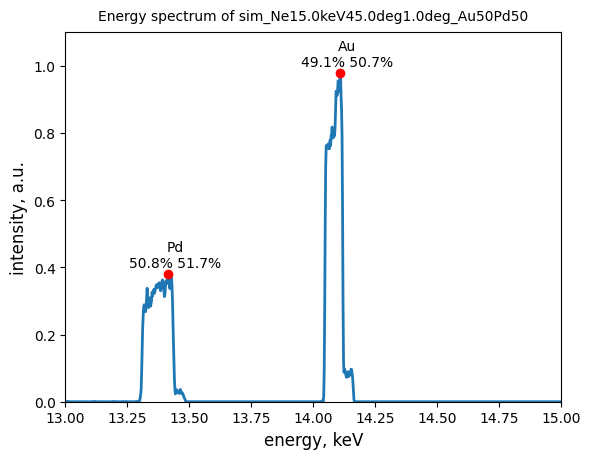

In [84]:
spectrum_path0 = os.getcwd()+os.sep+"raw_data"+os.sep

spectrum_path0 +="temp"+os.sep+"sim_Ne15.0keV45.0deg1.0deg_Au50Pd50.dat"

data = leis.spectrum(spectrum_path0, 10)
data.do_elemental_analysis()
leis.Emin = 13000
leis.Emax = 15000
leis.plot_spectrum_with_concs(data, title="Energy spectrum of "+data.calc_name)